# Module 6: Gradient Descent

In [16]:
# Setup the matplotlib styling
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import pandas as pd
import numpy as np

try:
    # Try to use the BI style sheet for plots
    line1 = (0/256, 224/256, 170/256)
    line2 = (96/256, 126/256, 229/256)
    line3 = (136/256, 76/256, 255/256)
    plt.style.use('matplotlibrc')
    plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[(136/256, 76/256, 255/256), (60/256, 170/256, 207/256), (12/256, 229/256, 177/256)]) 
    
    colors = [(0.53125, 0.296875, 0.99609375), (0.453125, 0.3984375, 0.9453125), (0.375, 0.4921875, 0.89453125), (0.3046875, 0.578125, 0.8515625), (0.234375, 0.6640625, 0.80859375), (0.16015625, 0.75390625, 0.76171875), (0.09375, 0.8359375, 0.72265625), (0.046875, 0.89453125, 0.69140625), (0.0, 0.875, 0.6640625)]
    bicmap = LinearSegmentedColormap.from_list(name='BIcmp', 
                                                colors=colors,
                                                N=len(colors))
    cm_bright = ListedColormap([(0.53125, 0.296875, 0.99609375), (12/256, 229/256, 177/256)])
    colors = np.array([line1, line2, line3])
except:
    bicmap = plt.cm.BuGn 
    colors = ['r', 'g', 'b']

## **Exercise 6.1**

The gradient descent method is an algorithm that minimizes a function f. It works like this:
- Initialize x to some value  
- While “still change”:  
    x=x -f'(x)  

### **Exercise 6.1.1**

We want to implement the gradient descend method in python for the function f(x)=x^4. Use x=5 as starting point.

In [17]:
# This is the function we want to minimize
def func(x):
    return x**4

In [18]:
# Create the derivative of f(x)
def gradient_f(x):
    return 4*x**3

In [19]:
# Our starting point will be x=5
x = 5
# Append all tried positions to this list
xpos = []

for i in range(5):
    # Use the gradient function to calculate the gradient
    grad_x = gradient_f(x)
    # Use the update rule from above to change the next x based on the gradient
    x = x - grad_x
    # Log the tried x to xpos
    xpos.append(x)

OverflowError: int too large to convert to float

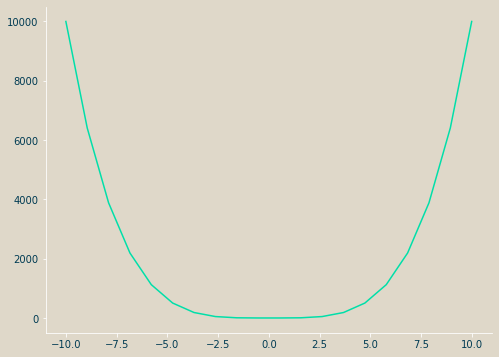

In [20]:
# Plot the results

# Create the target function
x_lin = np.linspace(-10, 10, 20)
f_lin = x_lin**4

# Calculate the y value for all tried points
ypos = [func(x) for x in xpos]

plt.plot(x_lin, f_lin, color=line1, label='Original function')
plt.scatter(xpos, ypos, color=line2, label='Checked points')
plt.legend()
plt.show()

**Does this strategy lead you to the minimal point 0?**

No

**What is the problem and what do you need to change?**

The gradient is too big. Learningrate is missing.

### **Exercise 6.1.2**

[5, 0.0, 0.0, 0.0, 0.0, 0.0]


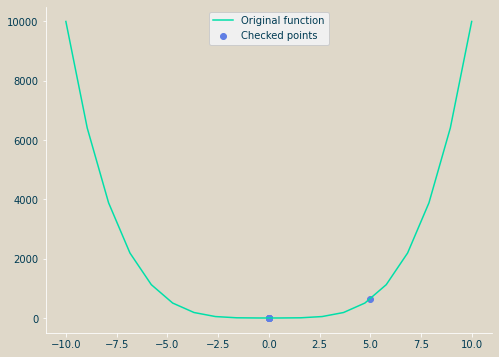

In [21]:
# Use the code from above, but this time include a learning rate

# Our starting point will be x=5
x = 5
# Append all tried positions to this list
xpos = [5]

for i in range(5):
    # Use the gradient function to calculate the gradient
    grad_x = gradient_f(x)
    # Use the update rule from above to change the next x based on the gradient this time with a learning rate
    x = x - 0.01 * grad_x
    # Log the tried x to xpos
    xpos.append(x)

# Plot the results
x_lin = np.linspace(-10, 10, 20)
f_lin = x_lin**4
print(xpos)
ypos = [func(x) for x in xpos]

plt.plot(x_lin, f_lin, color=line1, label='Original function')
plt.scatter(xpos, ypos, color=line2, label='Checked points')
plt.legend()
plt.show()

**Does this strategy lead you to the minimal point 0?**

Yes

## **Exercise 6.2: Linear Regression**

We want to implement our own Linear Regression modul with gradient descent.

### **Exercise 6.2.1: One-dimensional linear regression**

In [22]:
# Import the dataset
reg_data = pd.read_csv('data/LinearRegression.csv')
x = reg_data['x'].values
y = reg_data['y'].values
reg_data.head()

,x,y
0,-6.169611,-22.369883
1,2.442175,5.205885
2,-1.245445,-11.569649
3,5.707172,18.257405
4,5.599516,7.437287


In [23]:
# Define the linear regression as 
def f(x, intercept, slope):
    return intercept + slope * x

In [24]:
# Calculate the error as the difference between the desired output and the predicted output
def error(desired_y, predicted_y):
    return desired_y - predicted_y

In [25]:
# Define the loss as the squared sum of errors
def squared_loss(error):
    return np.sum(error**2)

In [26]:
# Define the gradients of our function
# Returning one gradient for intercept and one gradient for slope separated by a comma
def gradient_f(error, x):
    return np.mean(-2 * error), np.mean(-2 * x * error)

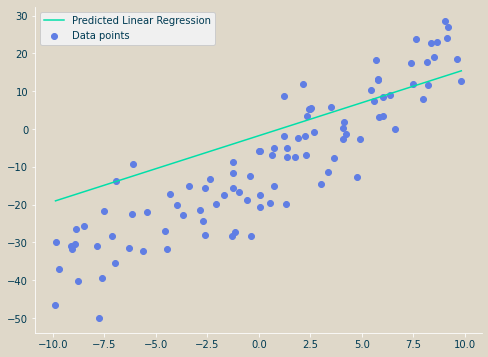

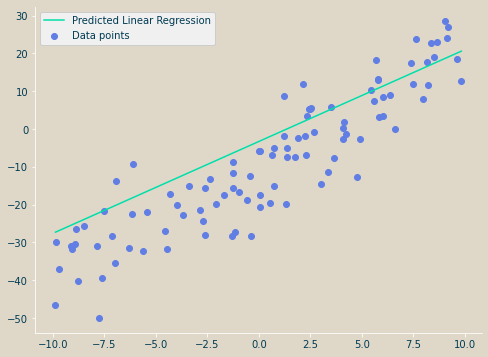

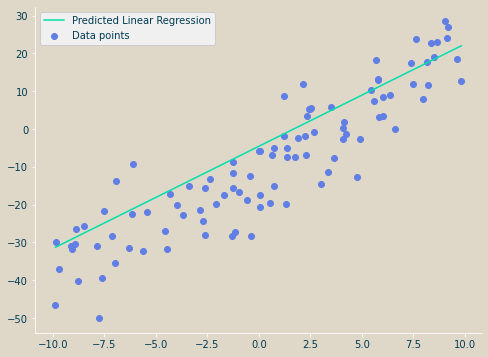

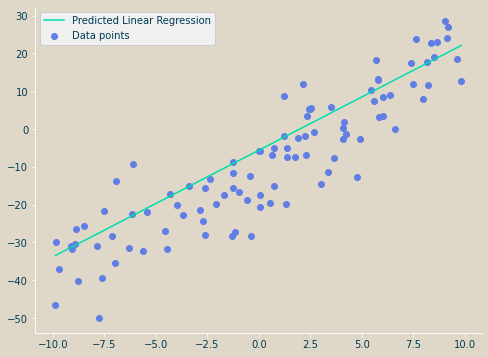

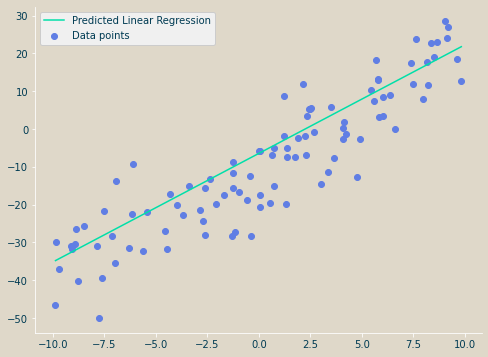

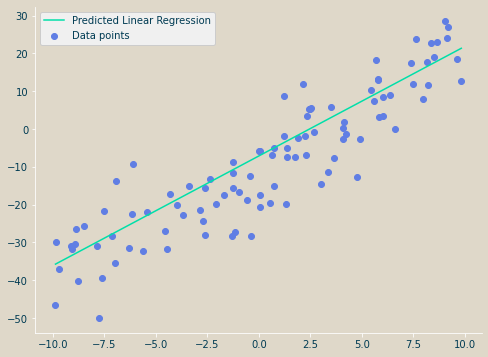

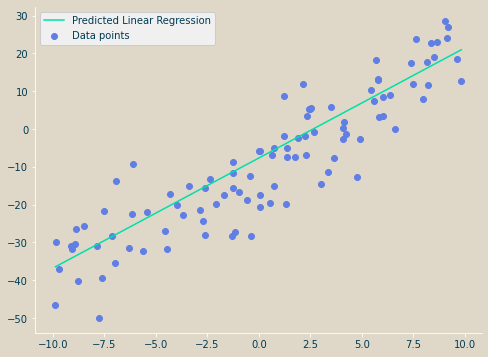

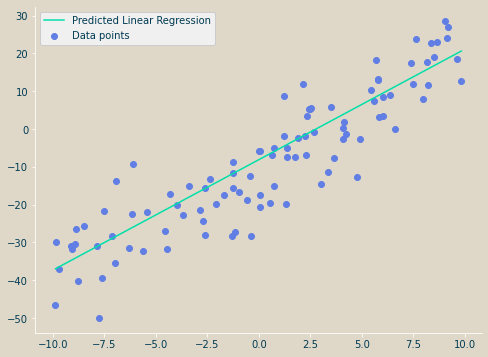

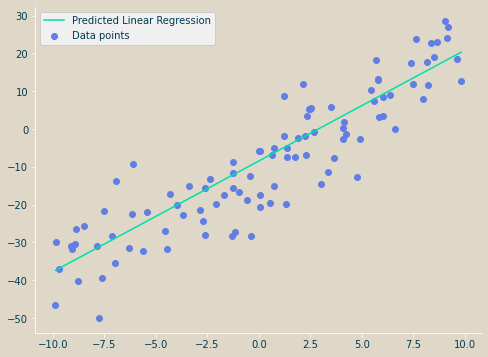

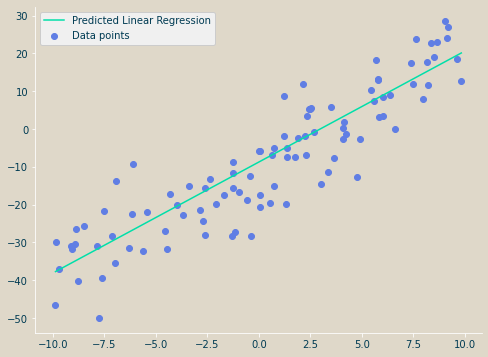

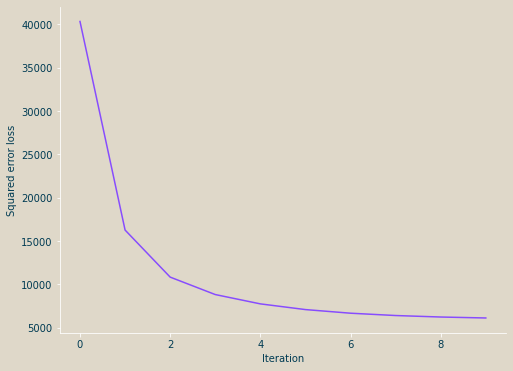

In [28]:
# Our starting point will
intercept = 0
slope = 0

loss = []

for i in range(10):
    # Make a prediction with the function f
    pred_y = f(x, intercept, slope)
    # Calculate the error of the prediction
    e = error(y, pred_y)
    # Calculate the loss
    l = squared_loss(e)
    # Calculate the gradient
    # Tip: The actual gradient is mean of the gradients from all data points
    grad_intercept, grad_slope = gradient_f(e, x)
    # Update the parameters based on your gradients
    # Tip: Use the learning rate of 0.1 for the intercept and 0.01 for the slope
    intercept -= 0.1 * grad_intercept
    slope -= 0.01 * grad_slope

    # Plot the results of the iteration
    x_lin = np.linspace(x.min(), x.max(), 40)
    f_lin = f(x_lin, intercept, slope)

    plt.plot(x_lin, f_lin, color=line1, label='Predicted Linear Regression')
    plt.scatter(x, y, color=line2, label='Data points')
    plt.legend()
    plt.show()

    loss.append(l)

plt.plot(list(range(10)), loss, label='loss')
plt.xlabel('Iteration')
plt.ylabel('Squared error loss')
plt.show()

### **Exercise 6.2.2: Doing something different**

For your above optimization process, change the update rule from
```python
theta = theta - lr * gradient
```
to
```python
theta = theta + lr * gradient
```

**What happens when you do that?**

This maximizes the error in each optimization step.

### **Bonues Exercise 6.2.3: Mulitdimensional Linear Regression**

Modify your code to allow optimizing any dimension.

In [27]:
from sklearn.datasets import make_regression

x, y = make_regression(n_features=20)

In [29]:
# Define the linear regression as 
def f(x, params):
    x = np.hstack([np.ones((x.shape[0], 1)), x])
    return np.sum(x * params, axis=1)

In [30]:
# Define the gradient function
def gradient_f(error, x):
    x = np.hstack([np.ones((x.shape[0], 1)), x])
    return np.mean(x * error[:, None] * -2, axis=0)

In [31]:
# Our starting point will be random
params = np.random.random((1, x.shape[1] + 1))

for i in range(30):
    # Make a prediction with the function f
    pred_y = f(x, params)
    # Calculate the error of the prediction
    e = error(y, pred_y)
    # Calculate the loss
    l = squared_loss(e)
    # Calculate the gradient
    gradients = gradient_f(e, x)
    # Update the parameters based on your gradients
    params = params - 0.1 * gradients

    # We can't plot 100 dimensions
    # Print the loss and see if it decreases
    print(l)

4060375.0166745707
2149737.509241561
1202925.767202964
708599.5730053246
436844.40409166826
280092.4472219656
185722.81166074198
126759.0768116531
88718.1474987302
63483.021035606434
46327.02271576958
34404.62508846395
25952.871325780216
19851.85186053622
15374.191059247014
12037.87497958648
9517.51204976717
7589.607212635754
6098.133731870196
4932.480687985269
4013.0901692338807
3281.9548392169154
2696.2365405016376
2223.9191638510583
1840.8064742227048
1528.4214321623558
1272.5178017874964
1062.0129355590468
888.2138298016538
744.2497838330868


## **Exercise 6.3: Logistic Regression**

In [72]:
clf_data = pd.read_csv('data/LogisticRegression.csv')
x = clf_data['x'].values
y = clf_data['y'].values
z = clf_data['z'].astype(int).values
clf_data.head()

,x,y,z
0,-0.284346,0.566367,True
1,-0.574360,-0.709653,True
2,-0.553362,-0.882603,True
3,-0.160872,-0.882011,True
4,-0.854180,-0.896058,True


### **Exercise 6.3.1: Two dimensional logistic regression**

In [49]:
# Define the logistic model
def logistic_regression(x, y, intercept, slope1, slope2):
    return 1/(1+np.e ** -(intercept + slope1 * x + slope2 * y))

In [51]:
# Define the gradient function
# Return separated by comma the gradients for intercept, slope1, slope2
def gradient_f(error, x, y, output):
    pre_comp = error * 2 * output * (1-output)
    return np.mean(pre_comp), np.mean(x *pre_comp), np.mean(y * pre_comp)

In [ ]:
# Our starting point will
intercept = 0
slope1 = 0
slope2 = 0

for i in range(50+1):
    # Make a prediction with the function f
    pred_z = logistic_regression(x, y, intercept, slope1, slope2)
    # Calculate the error of the prediction
    e = error(z, pred_z)
    # Calculate the loss
    l = squared_loss(e)
    # Calculate the gradient
    grad_intercept, grad_slope1, grad_slope2 = gradient_f(e, x, y, pred_y)
    # Update the parameters based on your gradients
    # Tip: A learning rate of 0.2 should work
    intercept -= 0.2 * grad_intercept
    slope1 -= 0.2 * grad_slope1
    slope2 -= 0.2 * grad_slope2
    # Every tenthed interation visualize the results
    if i % 10 == 0:
        # Visualize each iteration and and the loss
        h = 0.2 # Resolution
        xx, yy = np.meshgrid(np.arange(x.min()-0.5, x.max()+0.5, h), np.arange(y.min()-0.5, y.max()+0.5, h))
        zz = logistic_regression(xx.ravel(), yy.ravel(), intercept, slope1, slope2).reshape(xx.shape)

        plt.contourf(xx, yy, zz, cmap=bicmap, alpha=.8)
        plt.scatter(x, y, c=colors[1-z], cmap=bicmap, edgecolors='k')
        plt.title(f'Iteration {i}: Loss {l}')
        plt.show()

### **Bonus Exercise 6.3.2: Multi-dimensional Logistic Regression**

In [82]:
# Redefine the data for this
x = clf_data[['x', 'y']].values
y = clf_data['z'].values

In [83]:
# Define the logistic model
def logistic_regression(x, params):
    x = np.hstack([np.ones((x.shape[0], 1)), x])
    return 1/(1+np.e ** -np.sum(x * params, axis=1))

In [84]:
# Define the gradient function
def gradient_f(error, x, output):
    x = np.hstack([np.ones((x.shape[0], 1)), x])
    return np.mean(x * error[:, None] * 2 * output[:, None] * (1-output[:, None]), axis=0)

In [85]:
# Our starting point will
params = np.random.random((1, x.shape[1] + 1))

for i in range(100):
    # Make a prediction with the function f
    pred_y = f(x, params)
    # Calculate the error of the prediction
    e = error(y, pred_y)
    # Calculate the loss
    l = squared_loss(e)
    # Calculate the gradient
    gradients = gradient_f(e, x, pred_y)
    # Update the parameters based on your gradients
    params = params - 0.01 * gradients

    # We can't plot more than 3 dimensions
    # Print the loss and see if it decreases
    print(l)

72.05321105400304
71.40954218792848
70.7873825217527
70.18567517362429
69.60343315697614
69.03973363447552
68.49371273274888
67.9645608548687
67.45151843556923
66.95387209101403
66.47095112084908
66.0021243253814
65.54679710514395
65.10440881394555
64.67443033984279
64.25636189138086
63.84973096899287
63.4540905036717
63.06901714698121
62.69410969818766
62.32898765580259
61.97328988215999
61.626673370826616
61.28881210768625
60.959396017460556
60.63812998824982
60.32473296740471
60.01893712268962
59.72048706327718
59.42913911563038
59.14466064979148
58.86682945201155
58.59543314002554
58.330268617612234
58.071141565378284
57.81786596497614
57.57026365420903
57.328163910696574
57.091403061973026
56.85982412007009
56.63327643879949
56.41161539209756
56.19470207192855
55.982403004365466
55.77458988257716
55.57113931555212
55.37193259148122
55.176855454804816
54.98579789600741
54.79865395331166
54.61532152548908
54.43570219506193
54.25970106122553
54.0872265818693
53.918190424119395
53.752

## **Exercise 6.4: Categorical Loss**

Why would we prefer to use the this loss function instead of squared error: 
```
l(y,pred_y) = -[y log(y_pred) + (1-y) log⁡(1-y_pred)] 
```

/tmp/ipykernel_15172/1801721763.py:3: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)


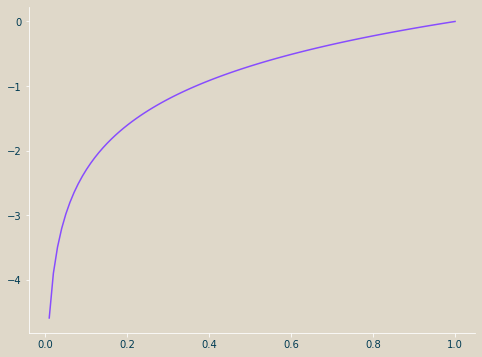

In [86]:
# Visualization of the logarithm in the range between 0 and 1
x = np.linspace(0, 1, 100)
y = np.log(x)

plt.plot(x, y)

Our true label can only be 0 or 1. Our prediction should be 0 or 1 but will be most of the time a value in between, representing our confidence in the prediction.

For the sake of simplicity, let's assume the model always predicts confidently 0 or 1. 

In [87]:
# Predict 0 when the true label is 0
0 * np.log(0) # will always be 0
(1-0) * np.log(1-0) # will be zero because log(1)=0
# Predicting 1 when the true label is 1
1 * np.log(1) # will be zero because np.log(1)=0
(1-1) * np.log(1-1) # will always be 0

/tmp/ipykernel_15172/3973296756.py:2: RuntimeWarning: divide by zero encountered in log
  0 * np.log(0) # will always be 0
/tmp/ipykernel_15172/3973296756.py:2: RuntimeWarning: invalid value encountered in double_scalars
  0 * np.log(0) # will always be 0
/tmp/ipykernel_15172/3973296756.py:6: RuntimeWarning: divide by zero encountered in log
  (1-1) * np.log(1-1) # will always be 0
/tmp/ipykernel_15172/3973296756.py:6: RuntimeWarning: invalid value encountered in double_scalars
  (1-1) * np.log(1-1) # will always be 0


nan

Depending on the true label, the loss is log(y_pred) or log(1-y_pred)

In [88]:
# In either case, if we are totally wrong the log loss is maximized
np.log(0)
# is - inf

/tmp/ipykernel_15172/2480566244.py:2: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

The log loss exponentially punishes mispredictions. It forces the model to predict either 0 or 1 with high confidence, while never fully commiting to one, because the loss there is exponentially higher.

In [89]:
# For regression problems with squared error the maximum loss is sum((y-y_pred)**2)
# given n dimensions
total_error = 0
for n in range(1, 10):
    # being completely wrong is an error of -1 or +1
    # so 1 with the squared
    error = 1
    # add up all the errors
    total_error += error
    print('Print total error: ', total_error, 'at dimension ', n)

Print total error:  1 at dimension  1
Print total error:  2 at dimension  2
Print total error:  3 at dimension  3
Print total error:  4 at dimension  4
Print total error:  5 at dimension  5
Print total error:  6 at dimension  6
Print total error:  7 at dimension  7
Print total error:  8 at dimension  8
Print total error:  9 at dimension  9


This show cases clearer that the mean squared error is not punishing mispredictions sufficiently.